In [3]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,roc_auc_score,confusion_matrix,roc_curve

In [5]:
# Loading Dataset

Df = pd.read_csv("customer_churn_large_dataset.csv")
Df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
# Checking for shape
Df.shape

(100000, 9)

In [7]:
# Information of dataset
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
# summarizing the data
Df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [9]:
# Checking for null Values
Df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There is no null values in the provided dataset.

In [10]:
Df['Location'].value_counts()# Shows the counts of each value present in column

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [14]:
# Checking for noise values
# function for noise values in each categorical data

for cols in list(Df.columns):
    print(round(Df[cols].value_counts()))
    print("---------------------------")

1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: CustomerID, Length: 100000, dtype: int64
---------------------------
Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64
---------------------------
33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    184

There is no noise values present in the given dataset.

In [15]:
Df1 =Df.copy() # copying the dataset

In [16]:
# datatypes of all columns
Df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [18]:
# Feature Scaling 
#Changing the object data type to categorical and then numerical


Df1.Location=Df1.Location.astype('category')
Df1.Gender=Df1.Gender.astype('category')

#Label Encoding
label_encoder = preprocessing.LabelEncoder()
Df1['Location']=label_encoder.fit_transform(Df1['Location'])
Df1['Gender']=label_encoder.fit_transform(Df1['Gender'])


In [19]:
# Dropping the cus_id column
# Because it doesnt show much impact for prediction
Df1.drop(['CustomerID'],axis=1,inplace = True )
Df1.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,1,2,17,73.36,236,0
1,Customer_2,62,0,4,1,48.76,172,0
2,Customer_3,24,0,2,5,85.47,460,0
3,Customer_4,36,0,3,3,97.94,297,1
4,Customer_5,46,0,3,19,58.14,266,0


## EDA

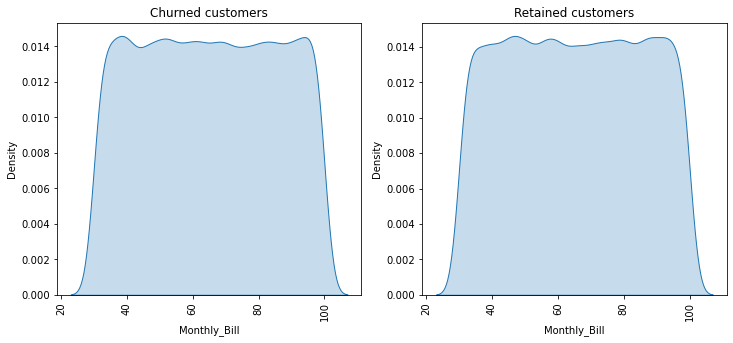

In [23]:
# creditscore of customers:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.kdeplot(data=Df[Df['Churn']==1],x='Monthly_Bill',shade=True)
plt.xticks(rotation='90')
plt.title("Churned customers")

plt.subplot(122)
sns.kdeplot(data=Df[Df['Churn']==0],x='Monthly_Bill',shade=True)
plt.xticks(rotation='90')
plt.title("Retained customers")

plt.show()

Interpretation : Both churned and retained are same in this dataset.

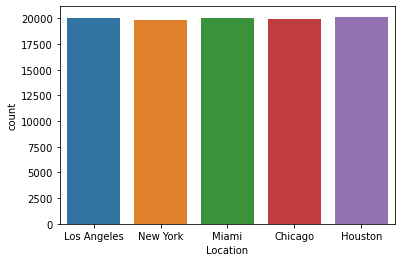

In [128]:
#Location wise count
sns.countplot(data=Df,x='Location')
plt.show()

<AxesSubplot:xlabel='Location', ylabel='count'>

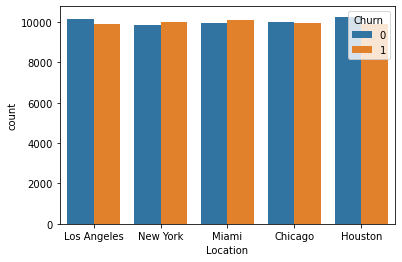

In [25]:
#Location wise churn :
sns.countplot(data=Df,x='Location',hue='Churn')
plt.chow()

In [27]:
# Churn rate 
churned_count = Df['Churn'].sum()
total_customers = len(Df)

churn_rate = churned_count / total_customers

print(f"Churn Rate: {churn_rate * 100:.2f}%")

Churn Rate: 49.78%


In [29]:
#Is there any difference in churn rates between genders?

gender_churn_rates = Df.groupby('Gender')['Churn'].mean()

print(gender_churn_rates)

Gender
Female    0.496734
Male      0.498855
Name: Churn, dtype: float64


In [31]:
# Are customers from specific locations more likely to churn?
location_churn_rates = Df.groupby('Location')['Churn'].mean()

# Sort the locations by churn rate in descending order to identify which locations have the highest churn rates
sorted_location_churn_rates = location_churn_rates.sort_values(ascending=False)

print(sorted_location_churn_rates)

Location
New York       0.503659
Miami          0.503020
Chicago        0.498296
Los Angeles    0.492989
Houston        0.491095
Name: Churn, dtype: float64


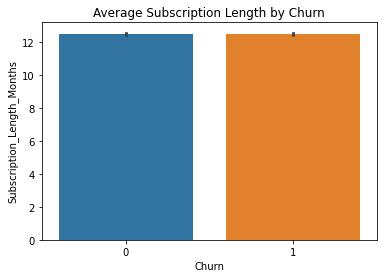

Churn
0    12.474045
1    12.506298
Name: Subscription_Length_Months, dtype: float64


In [34]:
# Relationship Between Churn and Subscription Length:
subscription_length_by_churn = Df.groupby('Churn')['Subscription_Length_Months'].mean()
# Visualize the relationship using a bar plot
sns.barplot(x='Churn', y='Subscription_Length_Months', data=Df)
plt.title('Average Subscription Length by Churn')
plt.show()

print(subscription_length_by_churn)

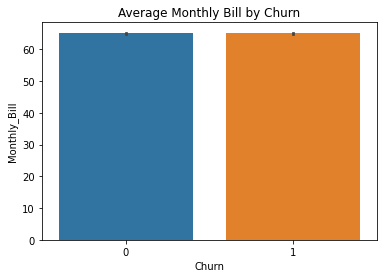

In [35]:
# Relationship Between Churn and Monthly Bill Amount
# Calculate average monthly bill amount for churned and non-churned customers
monthly_bill_by_churn = Df.groupby('Churn')['Monthly_Bill'].mean()

# Visualize the relationship using a bar plot
sns.barplot(x='Churn', y='Monthly_Bill', data=Df)
plt.title('Average Monthly Bill by Churn')
plt.show()

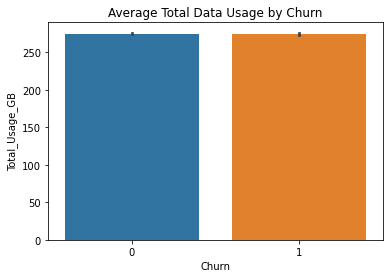

Churn
0    274.762729
1    274.021294
Name: Total_Usage_GB, dtype: float64


In [36]:
# Relationship Between Churn and Total Data Usage:

# Calculate average total data usage for churned and non-churned customers
data_usage_by_churn = Df.groupby('Churn')['Total_Usage_GB'].mean()

# Visualize the relationship using a bar plot
sns.barplot(x='Churn', y='Total_Usage_GB', data=Df)
plt.title('Average Total Data Usage by Churn')
plt.show()

print(data_usage_by_churn)

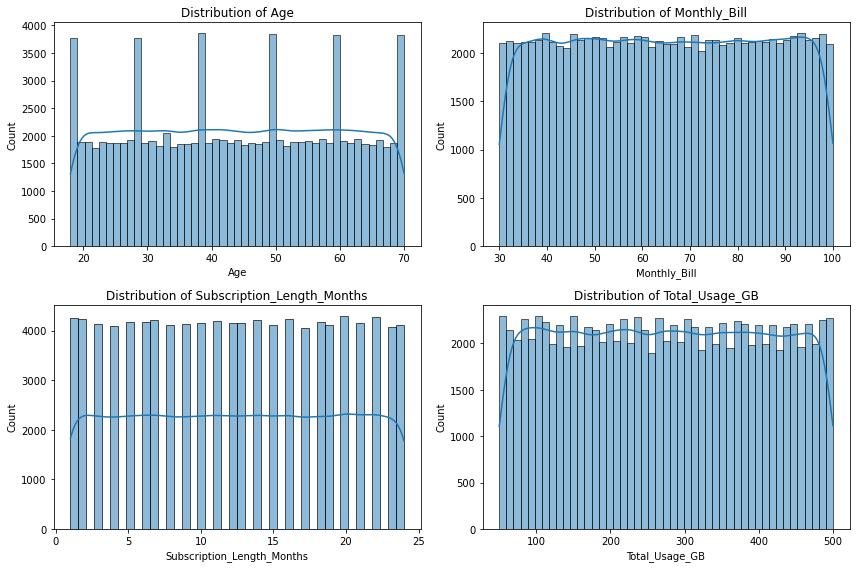

In [39]:
# Plot histograms for numerical variables
numerical_columns = ['Age', 'Monthly_Bill', 'Subscription_Length_Months', 'Total_Usage_GB']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The data was not in normal dostribution so we can use minmax scaler to normalize data in further process.

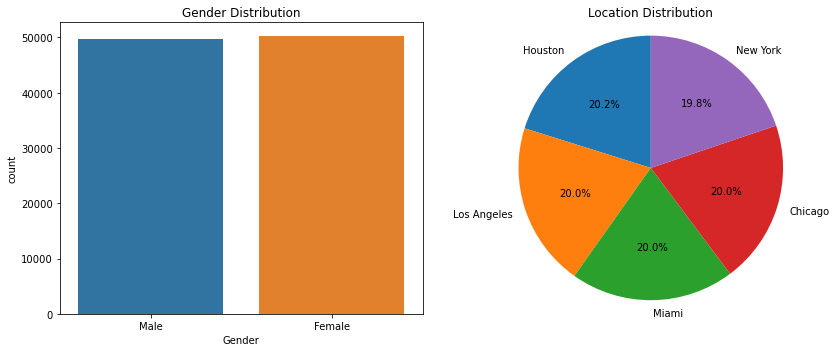

In [40]:
# Plot bar plots for Gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=Df, x='Gender')
plt.title('Gender Distribution')

# Plot pie chart for Location distribution
plt.subplot(1, 2, 2)
location_counts = Df['Location'].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Location Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.tight_layout()
plt.show()


The genders was in equal amount and aslo the dostributions of various locations are almost equal.

In [109]:
# Dropping unnecessary columns: 
Df1.drop(['Churn'],axis=1,inplace=True)#Dropping target var
Df1.drop(['Name'],axis=1,inplace=True)#dropping the names column
Df1.drop(['Location'],axis=1,inplace=True)


In [110]:
Df1.head(1)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,1,17,73.36,236


In [111]:
# Feature Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(Df1.to_numpy()),columns=Df1.columns)


In [112]:
scaled_df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.865385,1.0,0.695652,0.619429,0.413333
1,0.846154,0.0,0.000000,0.268000,0.271111
2,0.115385,0.0,0.173913,0.792429,0.911111
3,0.346154,0.0,0.086957,0.970571,0.548889
4,0.538462,0.0,0.782609,0.402000,0.480000
...,...,...,...,...,...
99995,0.288462,1.0,0.956522,0.359000,0.391111
99996,0.846154,0.0,0.782609,0.452143,0.668889
99997,0.884615,1.0,0.695652,0.944429,0.446667
99998,0.634615,0.0,0.826087,0.275000,0.853333


In [113]:
# adding target to scaled data
scaled_df['Churn'] = Df['Churn']
scaled_df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0.865385,1.0,0.695652,0.619429,0.413333,0
1,0.846154,0.0,0.000000,0.268000,0.271111,0
2,0.115385,0.0,0.173913,0.792429,0.911111,0
3,0.346154,0.0,0.086957,0.970571,0.548889,1
4,0.538462,0.0,0.782609,0.402000,0.480000,0


In [114]:
# Correlation
corr = Df.corr()

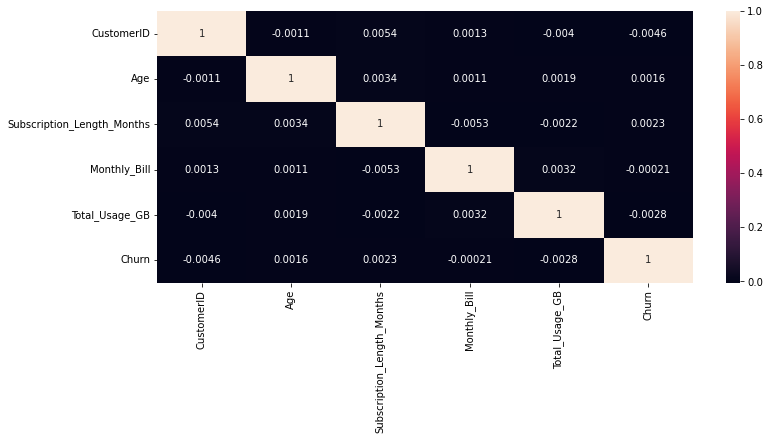

In [115]:
#Heatmap
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)
plt.show()
     

In [116]:
#Ranking 
rank=pd.DataFrame(corr['Churn']).reset_index()
rank.rename(columns={'index':'names','Churn':'values'},inplace=True)
rank.sort_values(by='values',ascending=False,inplace=True)
rank

,names,values
5,Churn,1.000000
2,Subscription_Length_Months,0.002328
1,Age,0.001559
3,Monthly_Bill,-0.000211
4,Total_Usage_GB,-0.002842
0,CustomerID,-0.004586


In [117]:
# splitting the data
x,y = scaled_df.iloc[:,:-1],scaled_df.iloc[:,-1]

In [118]:
# splitting of data into train and test on 70:30

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9)
x_train.shape,y_train.shape

((70000, 5), (70000,))

In [119]:
y_train.value_counts(normalize=True) # The target is imblanced so let's take precision score in CV


0    0.502943
1    0.497057
Name: Churn, dtype: float64

# Modelling

### ----> Loistic Regression :

In [120]:
# Logistic 
model_LR = LogisticRegression().fit(x_train,y_train)
y_pred1 = model_LR.predict(x_test)

In [121]:
# Accuracy of the training data set
train_accuracy = round(model_LR.score(x_train,y_train)*100,2)
train_accuracy

50.33

### --->Naive Bayes:

In [123]:
# Naive
# NB
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB()
model_NB.fit(x_train,y_train)
y_pred2 = model_NB.predict(x_test)
print("Accuaracy on train dataset :",round(model_NB.score(x_train,y_train)*100,2))

Accuaracy on train dataset : 50.42


### ----> Decision Tree :

In [124]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=6,
 min_samples_split=5,
 max_leaf_nodes=10) # After max depth 6 the acc is cons
model_DT.fit(x_train,y_train)
y_pred3 = model_DT.predict(x_test)
print("Accuaracy on train dataset :",round(model_DT.score(x_train,y_train)*100,2))

Accuaracy on train dataset : 51.03


### ----> Random Forest Bagging :

#### Hyper parameter tuning :

In [125]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

#### Grid search View :

In [126]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
n_jobs=-1, verbose=1, scoring="accuracy")
     

In [127]:

%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 25.4 s
Wall time: 9min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [129]:
grid_search.best_score_


0.5055857142857143

In [130]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [131]:
# random forest
model_Rf = RandomForestClassifier(random_state=42,min_samples_leaf=100, n_jobs=-1, max_depth=5, n_estimators=200, oob_score=True)
model_Rf.fit(x_train,y_train)
y_pred4 = model_Rf.predict(x_test)
print("Accuaracy on train dataset :",round(model_Rf.score(x_train,y_train)*100,2))

Accuaracy on train dataset : 52.68


### ----> Adaboost :

In [132]:
# BOosting : Adaboost
from sklearn.ensemble import AdaBoostClassifier

model_AB = AdaBoostClassifier()
model_AB.fit(x_train,y_train)
y_pred5 = model_AB.predict(x_test)
print("Accuarcy :",round(model_AB.score(x_train,y_train)*100,2))
     

Accuarcy : 51.68


### Cross Validation :

In [134]:
#CV for Logistic Regression
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model_LR, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "LR :" ,round(n_scores1.mean(),3))

# Cv for Naive base:
n_scores2 = cross_val_score(model_NB, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "NB :" ,round(n_scores2.mean(),3))

# Cv for Decision Tree:
n_scores3 = cross_val_score(model_DT, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "DT :" ,round(n_scores3.mean(),3))

# Cv for Random Forest:
n_scores4 = cross_val_score(model_Rf, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "RF :" ,round(n_scores4.mean(),3))

# Cv for Adaboost:
n_scores5 = cross_val_score(model_AB, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "AB :" ,round(n_scores5.mean(),3))

LR : 0.494
NB : 0.496
DT : 0.511
RF : 0.499
AB : 0.496


Decison Tree has the highest cross validation score.

### ROC Scores :

In [135]:
roc1 = roc_auc_score(y_test, model_LR.predict_proba(x_test)[:,1])
roc2 = roc_auc_score(y_test, model_NB.predict_proba(x_test)[:,1])
roc3 = roc_auc_score(y_test, model_DT.predict_proba(x_test)[:,1])
roc4 = roc_auc_score(y_test, model_Rf.predict_proba(x_test)[:,1])
roc5 = roc_auc_score(y_test, model_AB.predict_proba(x_test)[:,1])

In [136]:

print("ROC of LR :",round(roc1,2))
print("ROC of NB :",round(roc2,2))
print("ROC of DT :",round(roc3,2))
print("ROC of RF :",round(roc4,2))
print("ROC of AB :",round(roc5,2))

ROC of LR : 0.5
ROC of NB : 0.5
ROC of DT : 0.5
ROC of RF : 0.5
ROC of AB : 0.5


ROC scores are mostly similar to each other.

### ----> Performace metrix:

In [137]:

# Confusion Matrix
print(confusion_matrix(y_test,y_pred1))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred1).ravel()
print( "Logistic Regression :" ,tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred2))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred2).ravel()
print( "Naive base :" ,tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred3))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred3).ravel()
print("Decision Tree :",tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred4))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred4).ravel()
print( "Random Forest :",tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred5))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred5).ravel()
print("Adaboost :" ,tn,fp,fn,tp)
     

[[13558  1457]
 [13480  1505]]
Logistic Regression : 13558 1457 13480 1505
[[12588  2427]
 [12594  2391]]
Naive base : 12588 2427 12594 2391
[[11269  3746]
 [11236  3749]]
Decision Tree : 11269 3746 11236 3749
[[11226  3789]
 [11212  3773]]
Random Forest : 11226 3789 11212 3773
[[9437 5578]
 [9484 5501]]
Adaboost : 9437 5578 9484 5501


In [138]:
# Logistic Regression
print("accuracy :",round(accuracy_score(y_test,y_pred1),2))
print("recall :",round(recall_score(y_test,y_pred1),2))
print("f1_score :",round(f1_score(y_test,y_pred1),2))
print("precision :",round(precision_score(y_test,y_pred1),2))

accuracy : 0.5
recall : 0.1
f1_score : 0.17
precision : 0.51


In [139]:
# Naive base
print("accuracy :",round(accuracy_score(y_test,y_pred2),2))
print("recall :",round(recall_score(y_test,y_pred2),2))
print("f1_score :",round(f1_score(y_test,y_pred2),2))
print("precision :",round(precision_score(y_test,y_pred2),2))

accuracy : 0.5
recall : 0.16
f1_score : 0.24
precision : 0.5


In [140]:
# Decision Tree
print("accuracy :",round(accuracy_score(y_test,y_pred3),2))
print("recall :",round(recall_score(y_test,y_pred3),2))
print("f1_score :",round(f1_score(y_test,y_pred3),2))
print("precision :",round(precision_score(y_test,y_pred3),2))

accuracy : 0.5
recall : 0.25
f1_score : 0.33
precision : 0.5


In [141]:
# Random Forest
print("accuracy :",round(accuracy_score(y_test,y_pred4),2))
print("recall :",round(recall_score(y_test,y_pred4),2))
print("f1_score :",round(f1_score(y_test,y_pred4),2))
print("precision :",round(precision_score(y_test,y_pred4),2))

accuracy : 0.5
recall : 0.25
f1_score : 0.33
precision : 0.5


In [142]:
# Adaboost
print("accuracy :",round(accuracy_score(y_test,y_pred5),2))
print("recall :",round(recall_score(y_test,y_pred5),2))
print("f1_score :",round(f1_score(y_test,y_pred5),2))
print("precision :",round(precision_score(y_test,y_pred5),2))

accuracy : 0.5
recall : 0.37
f1_score : 0.42
precision : 0.5


In [143]:
final_df = pd.DataFrame()

In [145]:
final_df['Models']=['LR','NB','DT','RF','AB']
final_df['ROC_Score']=['0.5','0.5','0.5','0.5','0.5']
final_df['CV_Score'] = ['0.494','0.496','0.511','0.499','0.496']
final_df['Accuracy']=['0.5','0.5','0.5','0.5','0.5']
final_df['Recall']=['0.1','0.16','0.25','0.25','0.37']
final_df['f1'] = ['0.17','0.24','0.33','0.33','0.42']
final_df['Precision']=['0.5','0.5','0.5','0.5','0.5']

In [146]:
# Final result dataframe to compare and select best model.
final_df

,Models,ROC_Score,CV_Score,Accuracy,Recall,f1,Precision
0,LR,0.5,0.494,0.5,0.1,0.17,0.5
1,NB,0.5,0.496,0.5,0.16,0.24,0.5
2,DT,0.5,0.511,0.5,0.25,0.33,0.5
3,RF,0.5,0.499,0.5,0.25,0.33,0.5
4,AB,0.5,0.496,0.5,0.37,0.42,0.5


Where

LR : Logistic Regression

NB : NaiveBase

DT : Decision Tree

RF : RandomForest

AB : Adaboost

Conclusion: Here only aim is to get the good prediction of churned cutsomers.So,here recall and precision scores are most important performance metric rather than accuarcy.

--->By observing the above data "Decision tree" has the high Roc score and cross validation score.so,here the Decision tree model will be the good model to predict churn custmers.

## Prediction on new data :

In [147]:
a =  float(input("Enter age  :: (Range is 10 to 100 ) : "))
b = float(input("Enter Gender :: (1 for Male , 0 for Female ) : "))
c = float(input("Enter Subscription Length Moths :: (Range is 0 to 25) : "))
d = float(input("Enter Monthly Bill :: (Range is 0 to 100) "))
e = float(input("Enter Total usage of GB :: (Range is 0 to 500) : "))
data = (a,b,c,b,e)
input_Data = np.asarray(data)
input_data_reshape = input_Data.reshape(1,5)
scaler_1 = MinMaxScaler()
std_data =scaler_1.fit_transform(input_data_reshape)
ans = model_DT.predict(std_data)
if (ans[0] == 0):  
    print('Customer will not leaft')
else:  
    print('Customer will be leaft')

Enter age  :: (Range is 10 to 100 ) : 4
Enter Gender :: (1 for Male , 0 for Female ) : 0
Enter Subscription Length Moths :: (Range is 0 to 25) : 6
Enter Monthly Bill :: (Range is 0 to 100) 45
Enter Total usage of GB :: (Range is 0 to 500) : 455
Customer will be leaft


D:\python_software1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Firstly I had used 5 classification models , then by doing cross validation and comparimg all the results Decision tree was good at predicting the data.So,i have choosen decisoon tree alorithm for deployment.

So,if we enter the required data our model will be able produce related results whether the customer will be churn or retained.